## Understanding Portfolio Risk: Methods of Quantification
Investing in financial markets inherently involves risk. Portfolio risk, the potential for loss or variability in returns, is a critical consideration for investors aiming to achieve their financial goals while managing uncertainties. There are several methods used to quantify and assess portfolio risk, each offering unique insights into different aspects of risk management.

### **Volatility**

- Volatility is a key concept in finance that measures the degree of variation of returns for a financial instrument or portfolio over time. It is a statistical measure of the dispersion of returns and is often used as a proxy for risk. Higher volatility indicates greater fluctuations in price, which can lead to larger potential losses or gains.

- Volatility measures the degree of variation in returns for a portfolio. Higher volatility indicates greater uncertainty and risk. Managing volatility is essential for investors seeking stable returns and mitigating downside risks.



**Historical Volatility:** 
This is calculated using historical returns over a specific period. It provides insights into how much the price of an asset has fluctuated in the past.

Historical volatility is commonly calculated using the standard deviation of historical returns. If you have a series of historical returns $R_1, R_2, \ldots, R_n$  for a given period:

$\text{Historical Volatility} = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (R_i - \bar{R})^2}$

Where
$\bar{R}$  is the average return over the period.





[*********************100%%**********************]  1 of 1 completed


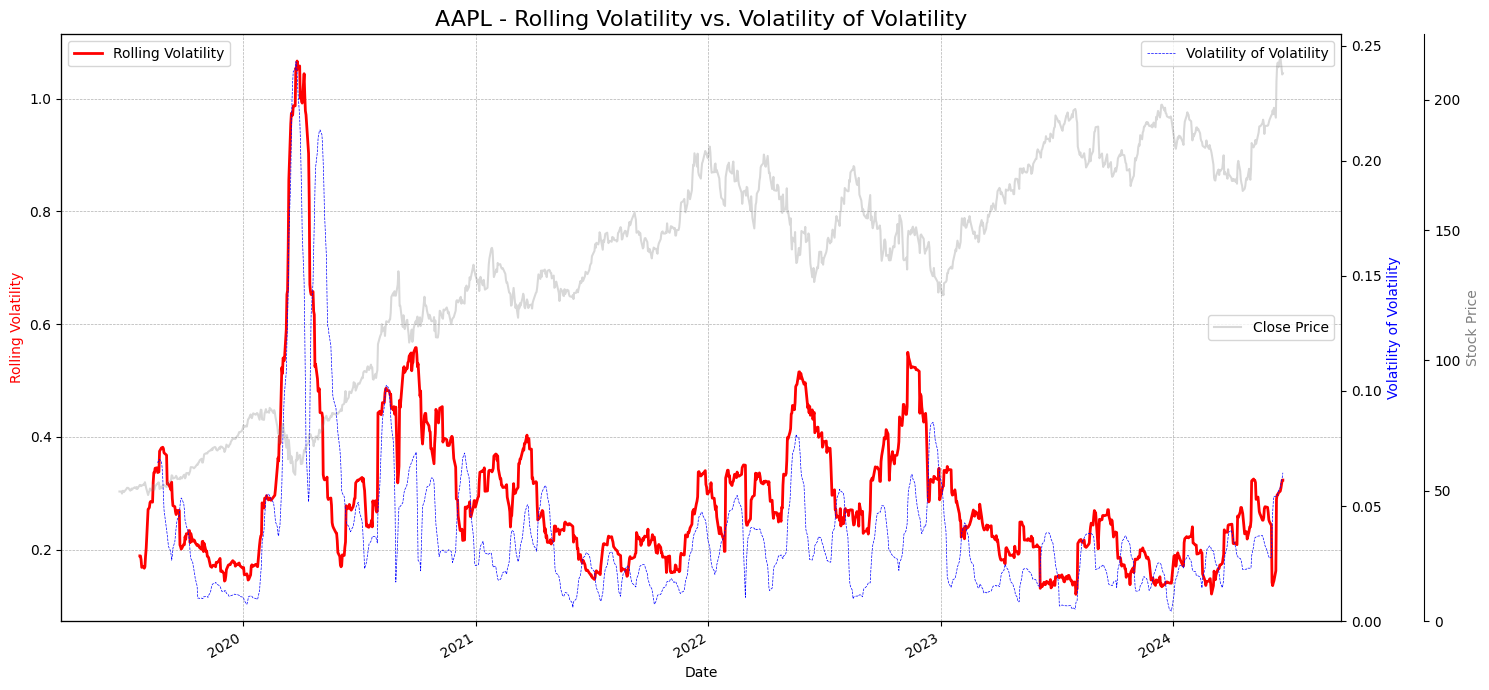

In [2]:
import yfinance as yf  # Importing yfinance library for fetching historical stock data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Global Parameters
ticker = "AAPL"  # Ticker symbol for State Bank of India stock
vol_period = 21  # Rolling window period for volatility calculation
ticker_period='5Y'

# Downloading historical data for the specified ticker for the past 1 year
data = yf.download(tickers=ticker, period=ticker_period)

# Calculate daily returns and rolling volatility
data['Return'] = data['Close'].pct_change()
data['Rolling_Volatility'] = data['Return'].rolling(window=vol_period).std() * np.sqrt(252)

# Calculate volatility of volatility (second-order volatility)
data['vol_of_volatility'] = data['Rolling_Volatility'].rolling(window=vol_period).std()

# Plotting the results
plt.figure(figsize=(15, 7))

# Plot Rolling Volatility on primary axis
ax1 = data['Rolling_Volatility'].plot(label='Rolling Volatility', color='red', linewidth=2)
ax1.set_ylabel('Rolling Volatility', color='red')

# Title and grid settings
ax1.set_title(f'{ticker} - Rolling Volatility vs. Volatility of Volatility', fontsize=16)
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create secondary axis for Volatility of Volatility
ax2 = ax1.twinx()
data['vol_of_volatility'].plot(ax=ax2, label='Volatility of Volatility', color='blue', linestyle='--', linewidth=0.5)
ax2.set_ylabel('Volatility of Volatility', color='blue')
ax2.set_ylim(0)

# Create third axis for Stock Price (Close Price)
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Move the last y-axis spine further to the right
data['Close'].plot(ax=ax3, label='Close Price', color='grey', alpha=0.3)  # Adjusted alpha value for visibility
ax3.set_ylabel('Stock Price', color='grey')
ax3.set_ylim(0)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='center right')

# Adjust layout and display plot
plt.tight_layout()
plt.show()



**Implied Volatility**: 

 Volatility is derived from option prices and reflects the market's expectations of future volatility. It is a forward-looking measure used primarily in options pricing models.Implied volatility is a bit more complex and is typically derived from option pricing models, such as the Black-Scholes model for European options. The formula for the Black-Scholes model is:

$\sigma_{\text{BS}} = \frac{1}{S \sqrt{T}} \frac{\partial C}{\partial S}$

Where

​
$\sigma_{\text{BS}}$ is the implied volatility,

$S$ is the current price of the underlying asset,

$T$ is the time to expiration of the option,

$C$ is the price of the option.


### **2. Beta Coefficient**

Beta measures the sensitivity of a portfolio's returns to movements in the overall market, usually represented by a benchmark index. A beta greater than 1 indicates the portfolio is more volatile than the market, while a beta less than 1 implies less volatility. This metric helps investors understand how their portfolio might perform relative to broader market movements.



In [2]:
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_beta(stock_ticker, index_ticker, start_date, end_date):
    """
    Calculate beta of a stock relative to a market index over a specified period.

    Parameters:
    - stock_ticker (str): Ticker symbol of the stock (e.g., 'AAPL' for Apple Inc.).
    - index_ticker (str): Ticker symbol of the market index (e.g., '^GSPC' for S&P 500).
    - start_date (str): Start date in 'YYYY-MM-DD' format for historical data.
    - end_date (str): End date in 'YYYY-MM-DD' format for historical data.

    Returns:
    - beta (float): Beta of the stock relative to the market index.
    """
    # Download historical data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']
    index_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    stock_returns = stock_data.pct_change().dropna()
    index_returns = index_data.pct_change().dropna()

    # Calculate covariance and variance of stock and index returns
    covariance = np.cov(stock_returns, index_returns)[0, 1]
    index_variance = np.var(index_returns)

    # Calculate beta as covariance / variance of market index
    beta = covariance / index_variance

    return beta

# Example usage:
stock_ticker = 'AAPL'  # Ticker symbol for Apple Inc.
index_ticker = '^GSPC'  # Ticker symbol for S&P 500 index
start_date = '2023-01-01'  # Start date for historical data
end_date = '2024-01-01'  # End date for historical data

# Calculate beta for AAPL relative to ^GSPC over the specified period
beta_aapl = calculate_beta(stock_ticker, index_ticker, start_date, end_date)
print(f'Beta for {stock_ticker} relative to {index_ticker}: {beta_aapl:.2f}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Beta for AAPL relative to ^GSPC: 1.11


**Calculating Beta for a Portfolio**

To calculate beta for a portfolio, you would weigh the betas of each individual stock by their respective portfolio weights. Here’s a simplified approach assuming equal weights for each stock in the portfolio:

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

def calculate_beta(stock_ticker, index_ticker, start_date, end_date):
    """
    Calculate beta of a stock relative to a market index over a specified period.

    Parameters:
    - stock_ticker (str): Ticker symbol of the stock (e.g., 'AAPL' for Apple Inc.).
    - index_ticker (str): Ticker symbol of the market index (e.g., '^GSPC' for S&P 500).
    - start_date (str): Start date in 'YYYY-MM-DD' format for historical data.
    - end_date (str): End date in 'YYYY-MM-DD' format for historical data.

    Returns:
    - beta (float): Beta of the stock relative to the market index.
    """
    # Download historical data from Yahoo Finance
    stock_data = yf.download(stock_ticker, start=start_date, end=end_date)['Adj Close']
    index_data = yf.download(index_ticker, start=start_date, end=end_date)['Adj Close']

    # Calculate daily returns
    stock_returns = stock_data.pct_change().dropna()
    index_returns = index_data.pct_change().dropna()

    # Calculate covariance and variance of stock and index returns
    covariance = np.cov(stock_returns, index_returns)[0, 1]
    index_variance = np.var(index_returns)

    # Calculate beta as covariance / variance of market index
    beta = covariance / index_variance

    return beta

# Example portfolio with three stocks and their respective betas
portfolio_stocks = ['AAPL', 'MSFT', 'GOOGL']
weights = [0.3, 0.4, 0.3]  # Example weights (summing to 1)
index_ticker = '^GSPC'  # Example market index (S&P 500)

# Calculate beta for each stock in the portfolio and aggregate to get portfolio beta
portfolio_beta = 0
for i, stock in enumerate(portfolio_stocks):
    stock_beta = calculate_beta(stock, index_ticker, start_date='2023-01-01', end_date='2024-01-01')
    portfolio_beta += weights[i] * stock_beta

print(f'Beta of the portfolio: {portfolio_beta:.2f}')


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Beta of the portfolio: 1.22


[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


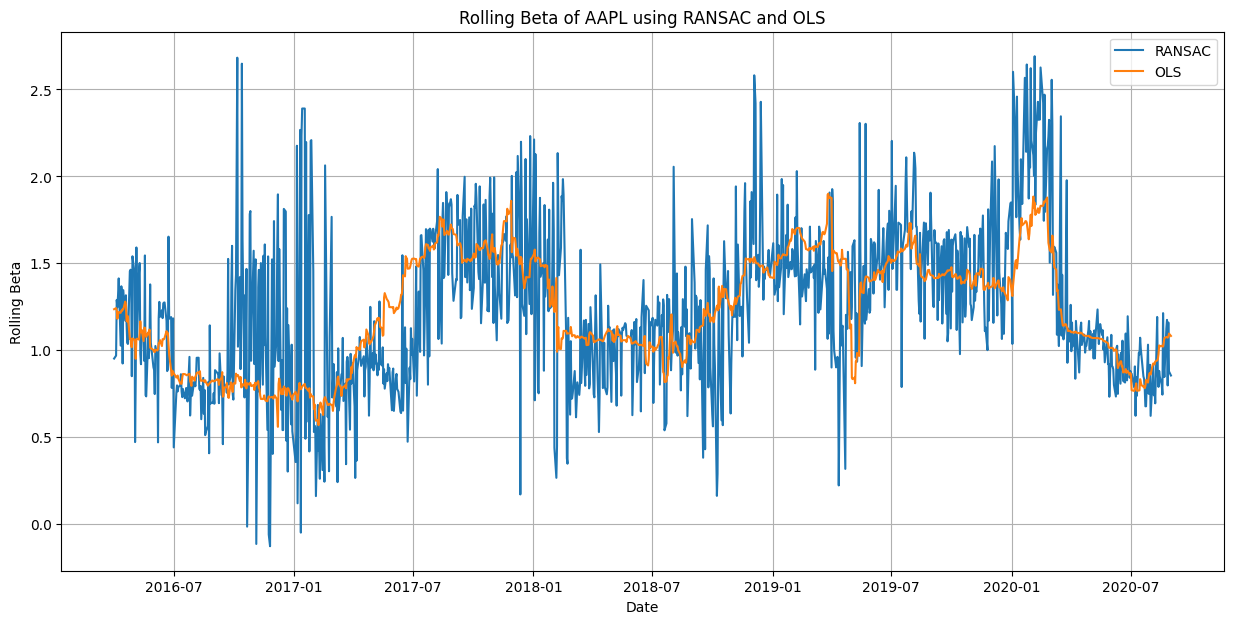

In [12]:
import yfinance as yf  # Importing yfinance library for fetching historical stock data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RANSACRegressor, LinearRegression

# Download historical data for ticker and a market index (e.g., ^AEX)
ticker = "AAPL"  # Ticker symbol for Apple Inc.
start_date = "2016-01-01"
end_date = "2020-09-01"

# Fetch historical data for the stock and a market index (^AEX as an example)
stock = yf.download(ticker, start=start_date, end=end_date)
market = yf.download("^GSPC", start=start_date, end=end_date)

# Calculate daily returns
stock_returns = stock["Adj Close"].pct_change().dropna()  # Calculate daily returns for the stock
market_returns = market["Adj Close"].pct_change().dropna()  # Calculate daily returns for the market index

# Align dates and remove rows with missing data
aligned_data = pd.concat([stock_returns, market_returns], axis=1).dropna()
aligned_data.columns = [ticker, "Market"]

# Calculate rolling beta using RANSAC and OLS
window = 60  # Choose the length of the rolling window
ransac = RANSACRegressor()  # Initialize RANSAC regressor for robust linear fitting
ols = LinearRegression()  # Initialize OLS (Ordinary Least Squares) regressor

rolling_beta_ransac = []
rolling_beta_ols = []

# Iterate through aligned_data to calculate rolling beta
for i in range(len(aligned_data) - window):
    X = aligned_data["Market"].iloc[i:i+window].values.reshape(-1, 1)  # Prepare market returns as X
    y = aligned_data[ticker].iloc[i:i+window].values  # Get stock returns as y
    
    # Fit RANSAC regressor and obtain beta
    ransac.fit(X, y)
    beta_ransac = ransac.estimator_.coef_[0]
    rolling_beta_ransac.append(beta_ransac)
    
    # Fit OLS regressor and obtain beta
    ols.fit(X, y)
    beta_ols = ols.coef_[0]
    rolling_beta_ols.append(beta_ols)

# Plot rolling beta
plt.figure(figsize=(15, 7))
plt.plot(aligned_data.index[window:], rolling_beta_ransac, label="RANSAC")
plt.plot(aligned_data.index[window:], rolling_beta_ols, label="OLS")
plt.xlabel("Date")
plt.ylabel("Rolling Beta")
plt.title(f"Rolling Beta of {ticker} using RANSAC and OLS")
plt.legend()
plt.grid()

# Display the plot
plt.show()


### **Sharpe Ratio**

The Sharpe Ratio measures the risk-adjusted return of a portfolio by evaluating the excess return (returns above the risk-free rate) per unit of risk (standard deviation). A higher Sharpe Ratio indicates better risk-adjusted performance, helping investors compare different portfolios or assess the efficiency of their asset allocation.

The Sharpe Ratio, named after its creator William F. Sharpe, is a fundamental metric in finance used to assess the risk-adjusted performance of an investment strategy or portfolio. It quantifies the excess return generated per unit of risk undertaken, where risk is commonly represented by the standard deviation of returns.

$S = \frac{R_p - R_f}{\sigma_p}$



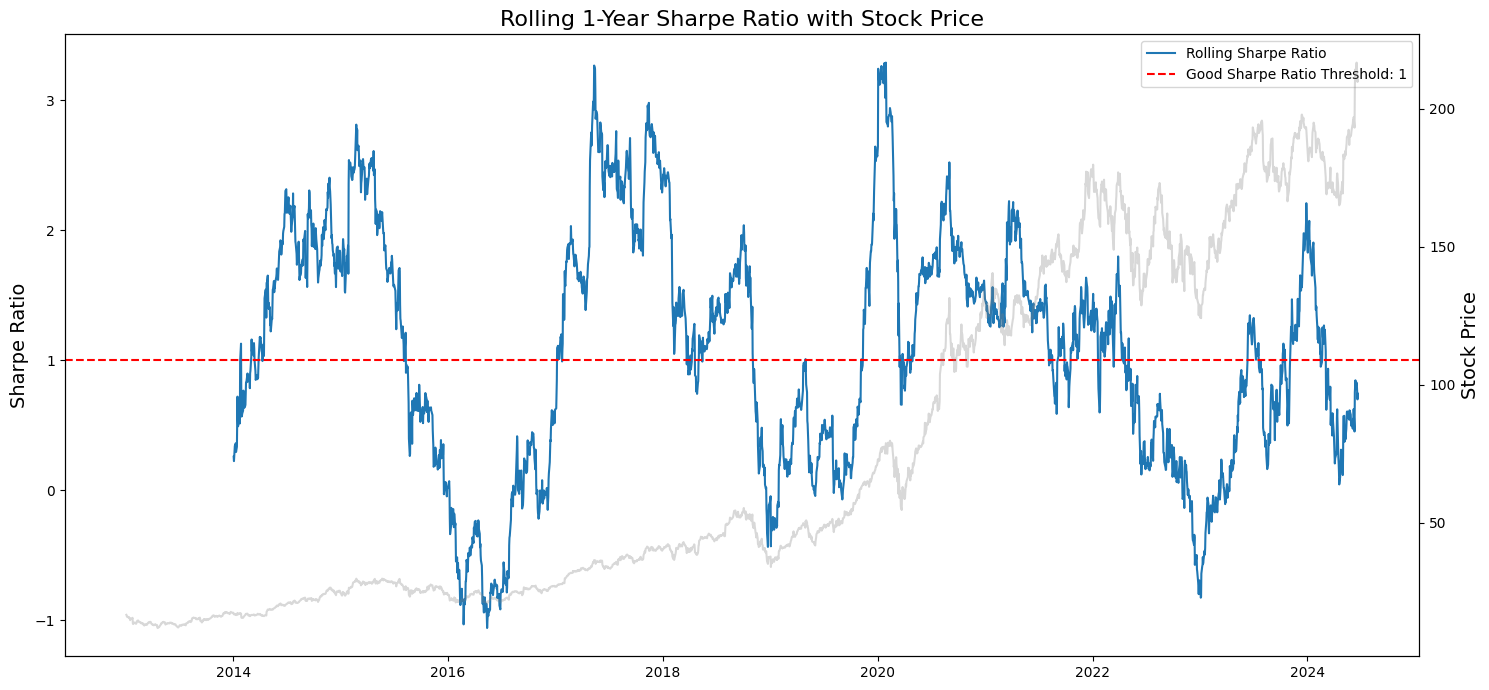

In [29]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Apple
tickerSymbol = 'AAPL'

# Fetch historical data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2013-01-01')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculate annualized rolling Sharpe Ratio
rolling_sharpe = np.sqrt(252) * tickerDf['returns'].rolling(window=252).mean() / tickerDf['returns'].rolling(window=252).std()

# Plotting
plt.figure(figsize=(15,7))

# Plot Rolling Sharpe Ratio
plt.plot(rolling_sharpe, label='Rolling Sharpe Ratio', linewidth=1.5)

# Plotting the threshold line
plt.axhline(y=1, color='red', linestyle='--', label='Good Sharpe Ratio Threshold: 1')

# Adding titles and labels
plt.title('Rolling 1-Year Sharpe Ratio with Stock Price', fontsize=16)
plt.ylabel('Sharpe Ratio', fontsize=14)
plt.legend()

# Creating a secondary y-axis for Stock Price
plt.twinx()
plt.plot(tickerDf['Close'], color='grey', alpha=0.3, label='Stock Price')
plt.ylabel('Stock Price', fontsize=14)

# Adjusting layout for better visualization
plt.tight_layout()
plt.show()


The Treynor Ratio, named after Jack Treynor, is a risk-adjusted performance measure used to evaluate the returns generated by an investment per unit of systematic risk undertaken. Unlike the Sharpe Ratio, which considers total volatility (standard deviation) as a measure of risk, the Treynor Ratio focuses solely on systematic risk, which is captured by beta. Systematic risk refers to the risk that cannot be diversified away and is inherent to the market or a specific segment of it.

$\text{Treynor Ratio} = \frac{R_p - R_f}{\beta_p}$


Components of the Formula:
Expected Portfolio Return : This represents the average return that an investor expects to earn from the portfolio.

Risk-Free Rate : The return on a risk-free investment, often approximated by the yield on government bonds. It represents the return an investor could earn with no risk.

Beta: Beta measures the sensitivity of the portfolio's returns to movements in the market. It quantifies the portfolio's systematic risk relative to the market. A beta of 1 indicates the portfolio moves in line with the market, while a beta greater than 1 implies higher volatility than the market, and a beta less than 1 indicates lower volatility.

Interpretation:
- Higher Treynor Ratio: A higher value indicates that the portfolio has generated higher returns per unit of systematic risk taken. This suggests better risk-adjusted performance relative to its systematic risk exposure.

- Lower Treynor Ratio: Conversely, a lower Treynor Ratio suggests that the portfolio is not adequately compensated for the systematic risk it carries, relative to its returns.



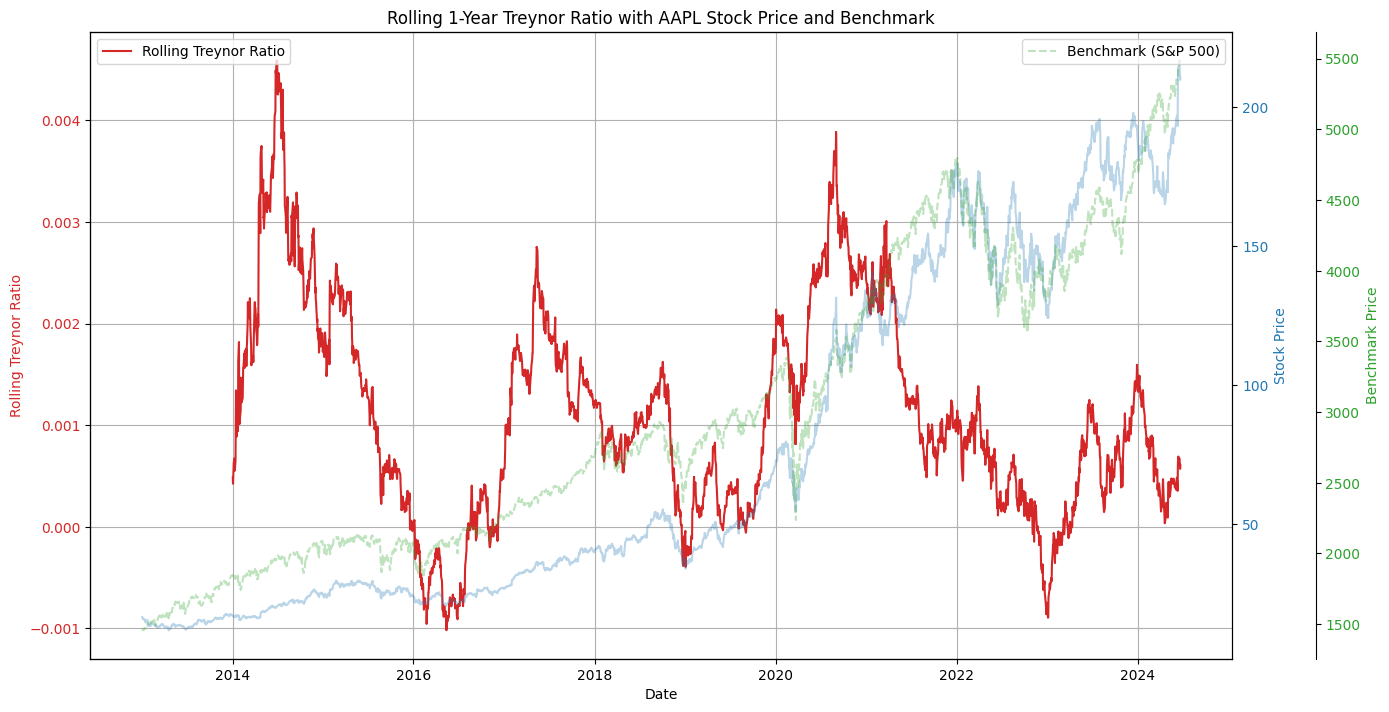

In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for Apple (AAPL)
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2013-1-1')
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Market data for benchmark (S&P 500)
benchmark_symbol = "^GSPC"
market_data = yf.Ticker(benchmark_symbol).history(period='1d', start='2013-1-1')
market_data['returns'] = market_data['Close'].pct_change()

# Align indices of market_data with tickerDf
market_data = market_data.reindex(tickerDf.index, method='ffill')

# Define window size for rolling calculations
window_size = 252

# Calculate rolling beta
covariance = tickerDf['returns'].rolling(window=window_size).cov(market_data['returns'])
variance = market_data['returns'].rolling(window=window_size).var()
rolling_beta = covariance / variance

# Calculate rolling Treynor Ratio
risk_free_rate = 0  # Assume risk-free rate as 0 for simplicity
avg_rolling_returns = tickerDf['returns'].rolling(window=window_size).mean()
tickerDf['rolling_treynor_ratio'] = (avg_rolling_returns - risk_free_rate) / rolling_beta

# Plotting
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Rolling Treynor Ratio
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Rolling Treynor Ratio', color=color)
ax1.plot(tickerDf['rolling_treynor_ratio'], label="Rolling Treynor Ratio", color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)
ax1.legend(loc="upper left")

# Create twin axes for stock price
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Stock Price', color=color)
ax2.plot(tickerDf['Close'], label="AAPL Stock Price", color=color, alpha=0.3)
ax2.tick_params(axis='y', labelcolor=color)

# Create twin axes for benchmark price
ax3 = ax1.twinx()
color = 'tab:green'
ax3.spines['right'].set_position(('outward', 60))  # Offset the twin axis to the right
ax3.set_ylabel('Benchmark Price', color=color)
ax3.plot(market_data['Close'], label="Benchmark (S&P 500)", linestyle="--", color=color, alpha=0.3)
ax3.tick_params(axis='y', labelcolor=color)

# Adjust layout and display
fig.tight_layout()  # Adjust layout to prevent overlap of labels
ax3.legend(loc="upper right")
plt.title('Rolling 1-Year Treynor Ratio with AAPL Stock Price and Benchmark')
plt.show()


### **Jensen’s Alpha**

Jensen's Alpha, also known as the Jensen Index or Jensen's Measure, is a risk-adjusted performance metric used in finance to evaluate the excess return of an investment portfolio or asset manager relative to its expected return, given its level of risk. It helps determine whether an investment manager has outperformed or underperformed a given benchmark after adjusting for the risk taken.

$\text{Jensen's Alpha} = R_{p} - (R_{f} + \beta_{p} \times (R_{m} - R_{f}))$


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


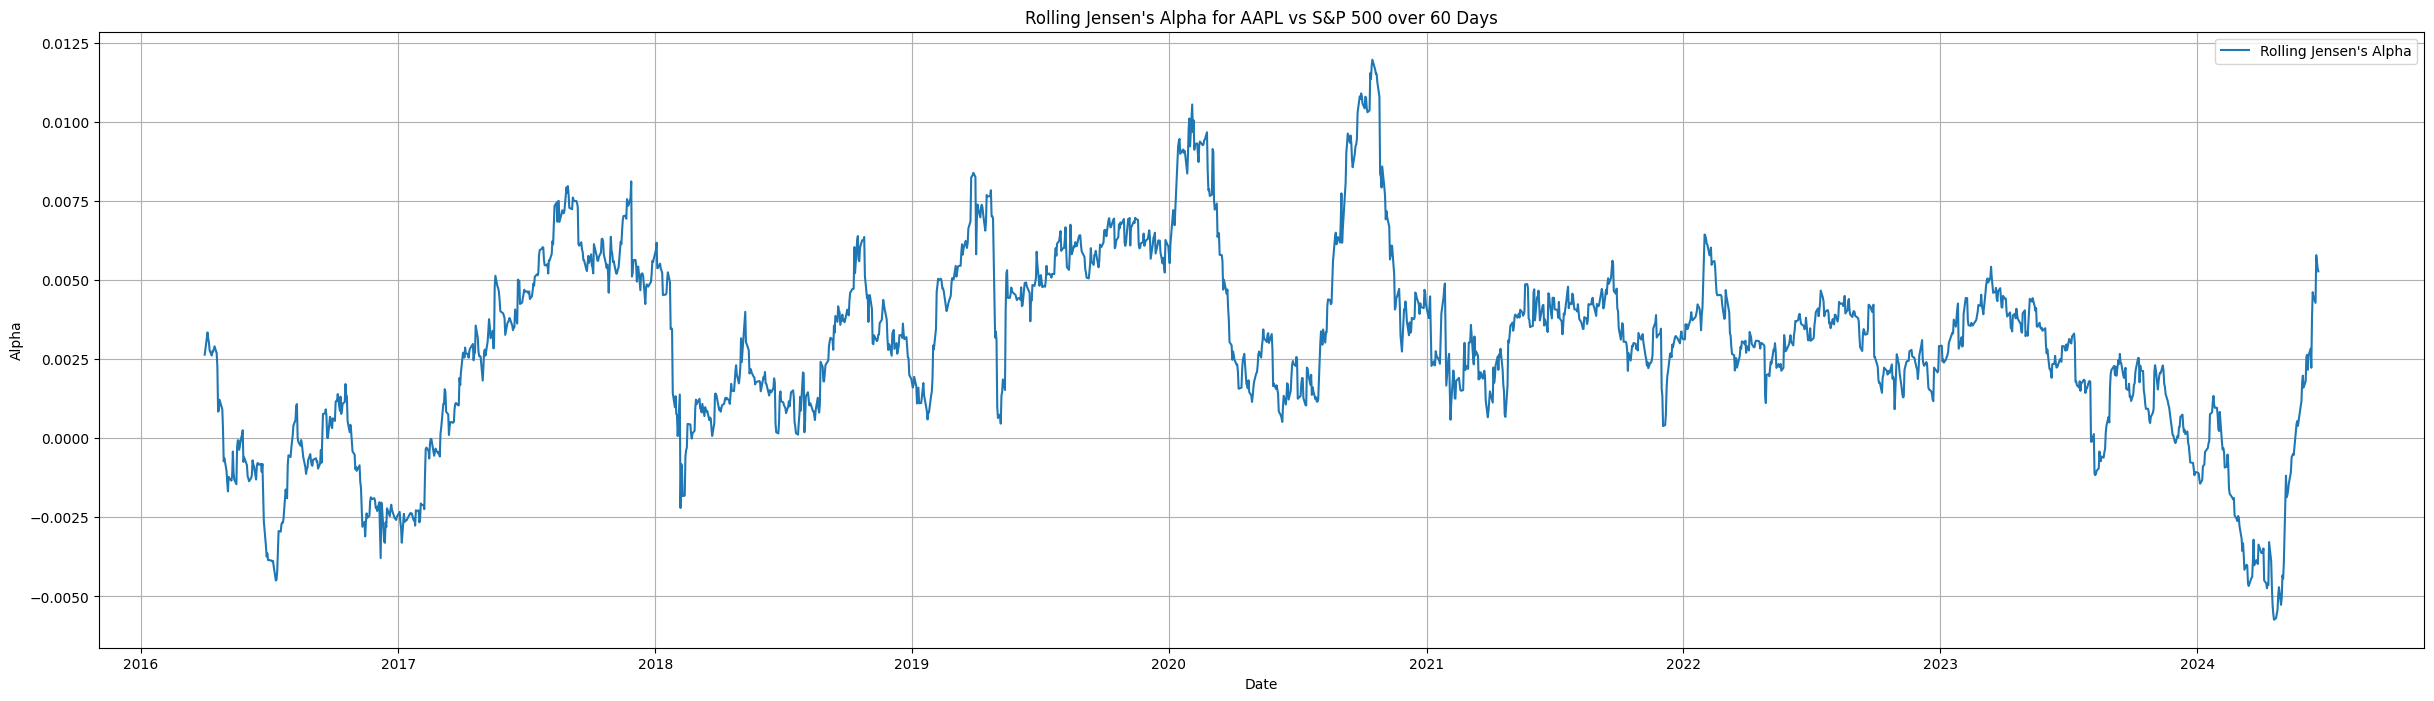

In [13]:
import yfinance as yf  # Importing yfinance library for fetching historical stock data
import pandas as pd
import matplotlib.pyplot as plt

# Download historical data for AAPL (Apple Inc.) and ^GSPC (S&P 500 index)
start_date = "2016-01-01"
end_date = "2025-09-01"
stock = yf.download("AAPL", start=start_date, end=end_date)  # Download AAPL data
market = yf.download("^GSPC", start=start_date, end=end_date)  # Download S&P 500 data

# Calculate daily returns
stock_returns = stock["Adj Close"].pct_change().dropna()  # Calculate daily returns for AAPL
market_returns = market["Adj Close"].pct_change().dropna()  # Calculate daily returns for S&P 500

# Align data
aligned_data = pd.concat([stock_returns, market_returns], axis=1).dropna()  # Combine returns and drop NaN values
aligned_data.columns = ["Stock", "Market"]  # Rename columns for clarity

window = 60  # Rolling window length
risk_free_rate = 0.01  # Example constant risk-free rate

rolling_alpha = []

# Calculate rolling Jensen's Alpha
for i in range(len(aligned_data) - window):
    data_window = aligned_data.iloc[i:i+window]
    beta = data_window.cov().iloc[0, 1] / data_window["Market"].var()  # Calculate beta
    expected_return = risk_free_rate + beta * (data_window["Market"].mean() - risk_free_rate)  # Calculate expected return
    alpha = data_window["Stock"].mean() - expected_return  # Calculate Jensen's Alpha
    rolling_alpha.append(alpha)  # Append Jensen's Alpha to the rolling_alpha list

# Plotting
plt.figure(figsize=(30, 8))
plt.plot(aligned_data.index[window:], rolling_alpha, label="Rolling Jensen's Alpha")  # Plot rolling Jensen's Alpha
plt.xlabel("Date")  # Label x-axis
plt.ylabel("Alpha")  # Label y-axis
plt.title(f"Rolling Jensen's Alpha for AAPL vs S&P 500 over {window} Days")  # Set title
plt.grid()  # Show grid
plt.legend()  # Show legend
plt.show()  # Display the plot


### **7. Value at Risk (VaR)**

VaR estimates the maximum potential loss in value of a portfolio over a specified time period and confidence level. It provides insight into the worst-case scenario loss an investor might face. VaR is valuable for setting risk tolerance and designing risk management strategies. 

Value at Risk (VaR) is a statistical measure widely used in finance and risk management to quantify the potential loss in value of a financial asset or portfolio over a specific time horizon for a given confidence interval. It provides an estimate of the maximum potential loss that an investment or portfolio may incur over a defined period under normal market conditions.

VaR is typically calculated using the following formula:

$\text{VaR}_{\alpha}(P) = P \times \sqrt{T} \times \sigma$


Interpretation:
Confidence Level , $α$: This represents the probability that the actual loss will not exceed the VaR over the specified time horizon. For example, a 95% confidence level (typically used) implies that there is a 5% chance that losses will exceed the calculated VaR.

Time Horizon,  $𝑇$ : Refers to the period over which the VaR is measured. It can be daily, weekly, monthly, or annually, depending on the context and requirements.

Standard Deviation,  $σ$: Measures the volatility or risk of the portfolio. It quantifies how much the portfolio's returns deviate from its mean return. Higher volatility results in a higher VaR.



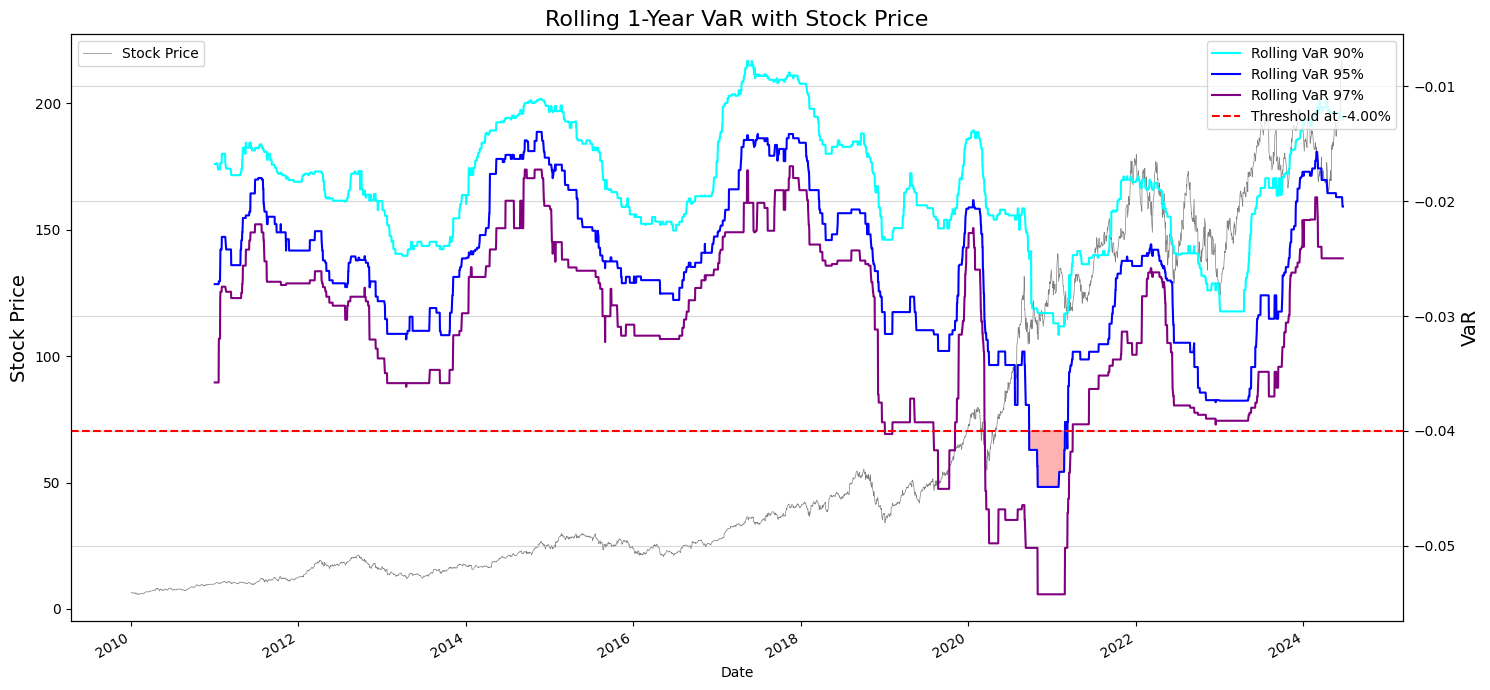

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = "AAPL"

# Fetch historical data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculate rolling VaR for 90%, 95%, and 97% confidence levels
rolling_var_90 = tickerDf['returns'].rolling(window=252).quantile(0.10).dropna()
rolling_var_95 = tickerDf['returns'].rolling(window=252).quantile(0.05).dropna()
rolling_var_97 = tickerDf['returns'].rolling(window=252).quantile(0.03).dropna()

threshold = -0.04  # Set the threshold value for visualization, adjust as needed

# Plotting
plt.figure(figsize=(15,7))

# Plotting stock price on primary y-axis
ax1 = plt.gca()
tickerDf['Close'].plot(ax=ax1, color='gray', linewidth=0.5, label='Stock Price')
ax1.set_ylabel('Stock Price', fontsize=14)
ax1.legend(loc='upper left')

# Plotting VaR on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(rolling_var_90.index, rolling_var_90, label='Rolling VaR 90%', color='cyan', linewidth=1.5)
ax2.plot(rolling_var_95.index, rolling_var_95, label='Rolling VaR 95%', color='blue', linewidth=1.5)
ax2.plot(rolling_var_97.index, rolling_var_97, label='Rolling VaR 97%', color='purple', linewidth=1.5)

# Adding a horizontal line to denote the threshold
ax2.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold at {threshold*100:.2f}%')

# Highlight areas below the threshold for 95% VaR
ax2.fill_between(rolling_var_95.index, rolling_var_95, threshold, where=(rolling_var_95 <= threshold), color='red', alpha=0.3)

# Aesthetics and final adjustments
ax2.set_ylabel('VaR', fontsize=14)
ax2.grid(True, alpha=0.5)
ax2.legend(loc='upper right')

plt.title('Rolling 1-Year VaR with Stock Price', fontsize=16)
plt.tight_layout()
plt.show()


### **Conditional Value at Risk (CVaR)**

Conditional Value at Risk (CVaR), also known as Expected Shortfall (ES) or Tail VaR, is a risk measure that extends the concept of Value at Risk (VaR) by providing an estimate of the expected loss in the tail of the distribution of returns beyond the VaR threshold. It quantifies the average value of losses that occur beyond the VaR level, given that those losses exceed the VaR threshold.

Formula for Conditional Value at Risk (CVaR)

CVaR at a confidence level $α$ is calculated as the expected value of the tail losses that exceed the VaR at $α$:

$\text{CVaR}_{\alpha}(P) = \frac{1}{1-\alpha} \int_{\alpha}^{1} \text{VaR}_{p}(P) \, dp$

Alternatively, CVaR can be computed as the average of all losses exceeding the VaR at $α$:

$\text{CVaR}_{\alpha}(P) = \frac{1}{1-\alpha} \sum_{\{ p \mid p \leq \alpha \}} \frac{\text{VaR}_{p}(P) - \text{VaR}_{\alpha}(P)}{\alpha}$

where, 

- $\text{CVaR}_{\alpha}(P)$ = Conditional Value at Risk at confidence level α and for portfolio P.

- $\text{VaR}_{p}(P)$ = Value at Risk at confidence level p.

- $\text{VaR}_{\alpha}(P)$ = Value at Risk at confidence level α.

- $1 - \alpha$ = Probability of not exceeding the VaR threshold α.


**Confidence Level α** - Represents the probability level at which the CVaR is calculated. For instance, a 95% CVaR at a confidence level of 95% means that we are estimating the expected loss beyond the 95% VaR threshold.

**Calculation**: CVaR extends beyond VaR by considering the expected value of losses in the tail of the distribution beyond the VaR threshold. It provides a measure of the severity of losses in adverse scenarios.

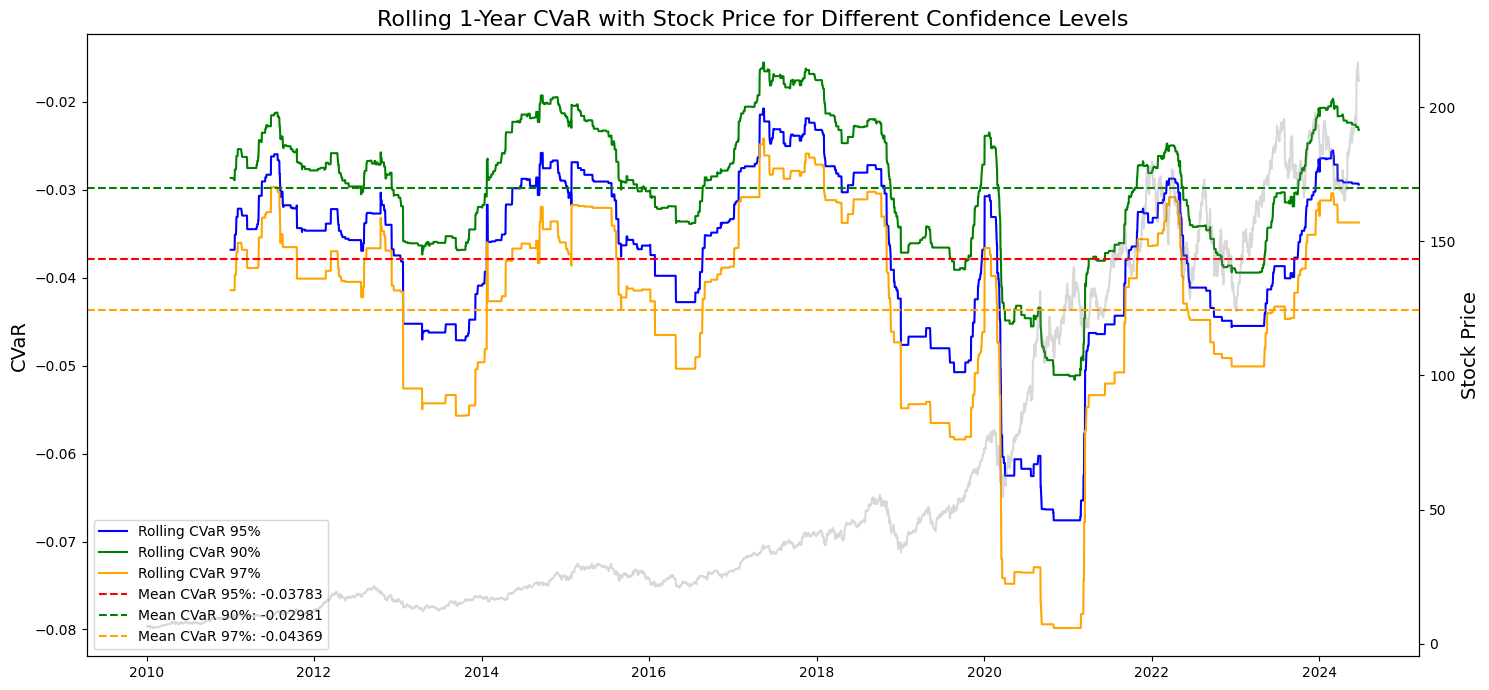

In [17]:
import pandas as pd  # Importing pandas library for data manipulation
import numpy as np   # Importing numpy library for numerical operations
import yfinance as yf   # Importing yfinance library for fetching financial data
import matplotlib.pyplot as plt   # Importing matplotlib library for plotting

# Define the ticker symbol
tickerSymbol = "AAPL"

# Fetch historical data from Yahoo Finance
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Function to calculate Conditional Value at Risk (CVaR)
def conditional_var(x, alpha=0.05):
    var = np.percentile(x, alpha * 100)   # Calculate VaR at alpha level
    return np.mean(x[x < var])   # Calculate CVaR as the average of losses beyond VaR

# Calculate rolling CVaR for 95%, 90%, and 97% confidence levels
rolling_cvar_95 = tickerDf['returns'].rolling(window=252).apply(conditional_var, raw=True).dropna()
rolling_cvar_90 = tickerDf['returns'].rolling(window=252).apply(lambda x: conditional_var(x, alpha=0.1), raw=True).dropna()
rolling_cvar_97 = tickerDf['returns'].rolling(window=252).apply(lambda x: conditional_var(x, alpha=0.03), raw=True).dropna()

# Calculate mean CVaR for each confidence level
mean_cvar_95 = rolling_cvar_95.mean()
mean_cvar_90 = rolling_cvar_90.mean()
mean_cvar_97 = rolling_cvar_97.mean()

# Plotting
plt.figure(figsize=(15,7))
ax1 = plt.gca()   # Get current axis for primary y-axis
ax1.plot(rolling_cvar_95, label='Rolling CVaR 95%', linewidth=1.5, color='blue')
ax1.plot(rolling_cvar_90, label='Rolling CVaR 90%', linewidth=1.5, color='green')
ax1.plot(rolling_cvar_97, label='Rolling CVaR 97%', linewidth=1.5, color='orange')
ax1.axhline(y=mean_cvar_95, color='red', linestyle='--', label=f'Mean CVaR 95%: {mean_cvar_95:.5f}')
ax1.axhline(y=mean_cvar_90, color='green', linestyle='--', label=f'Mean CVaR 90%: {mean_cvar_90:.5f}')
ax1.axhline(y=mean_cvar_97, color='orange', linestyle='--', label=f'Mean CVaR 97%: {mean_cvar_97:.5f}')
ax1.set_title('Rolling 1-Year CVaR with Stock Price for Different Confidence Levels', fontsize=16)
ax1.set_ylabel('CVaR', fontsize=14)
ax1.legend()   # Display legend for CVaR lines

ax2 = ax1.twinx()   # Create secondary y-axis for stock price
ax2.plot(tickerDf['Close'], color='grey', alpha=0.3, label='Stock Price')   # Plot stock price
ax2.set_ylabel('Stock Price', fontsize=14)   # Set label for secondary y-axis

plt.tight_layout()   # Adjust layout to prevent overlapping labels
plt.show()   # Display the plot


### **Rolling Statistics**

Dynamic risk management involves leveraging statistical measures to anticipate volatility or anomalies. Rolling statistics, computed over short windows, provide real-time insights into these dynamics, enabling agile and informed decision-making. In our analysis, we focused on a 20-day rolling window to examine several key statistical properties of price returns:

- Rolling Kurtosis: Measures tail risk. High kurtosis suggests a higher probability of extreme positive or negative returns, indicating potential volatility spikes.

- Rolling Skewness: Indicates the asymmetry of returns. Positive skewness implies frequent small losses and occasional large gains, while negative skewness suggests the opposite pattern.

- Rolling Quantile (Median): Offers a continuous view of the median price, helping to identify unusual price movements that deviate from the typical pattern.

- Rolling Autocorrelation: Measures the similarity between a stock's current performance and its past performance, essential for detecting recurring patterns in price movements.

[*********************100%%**********************]  1 of 1 completed


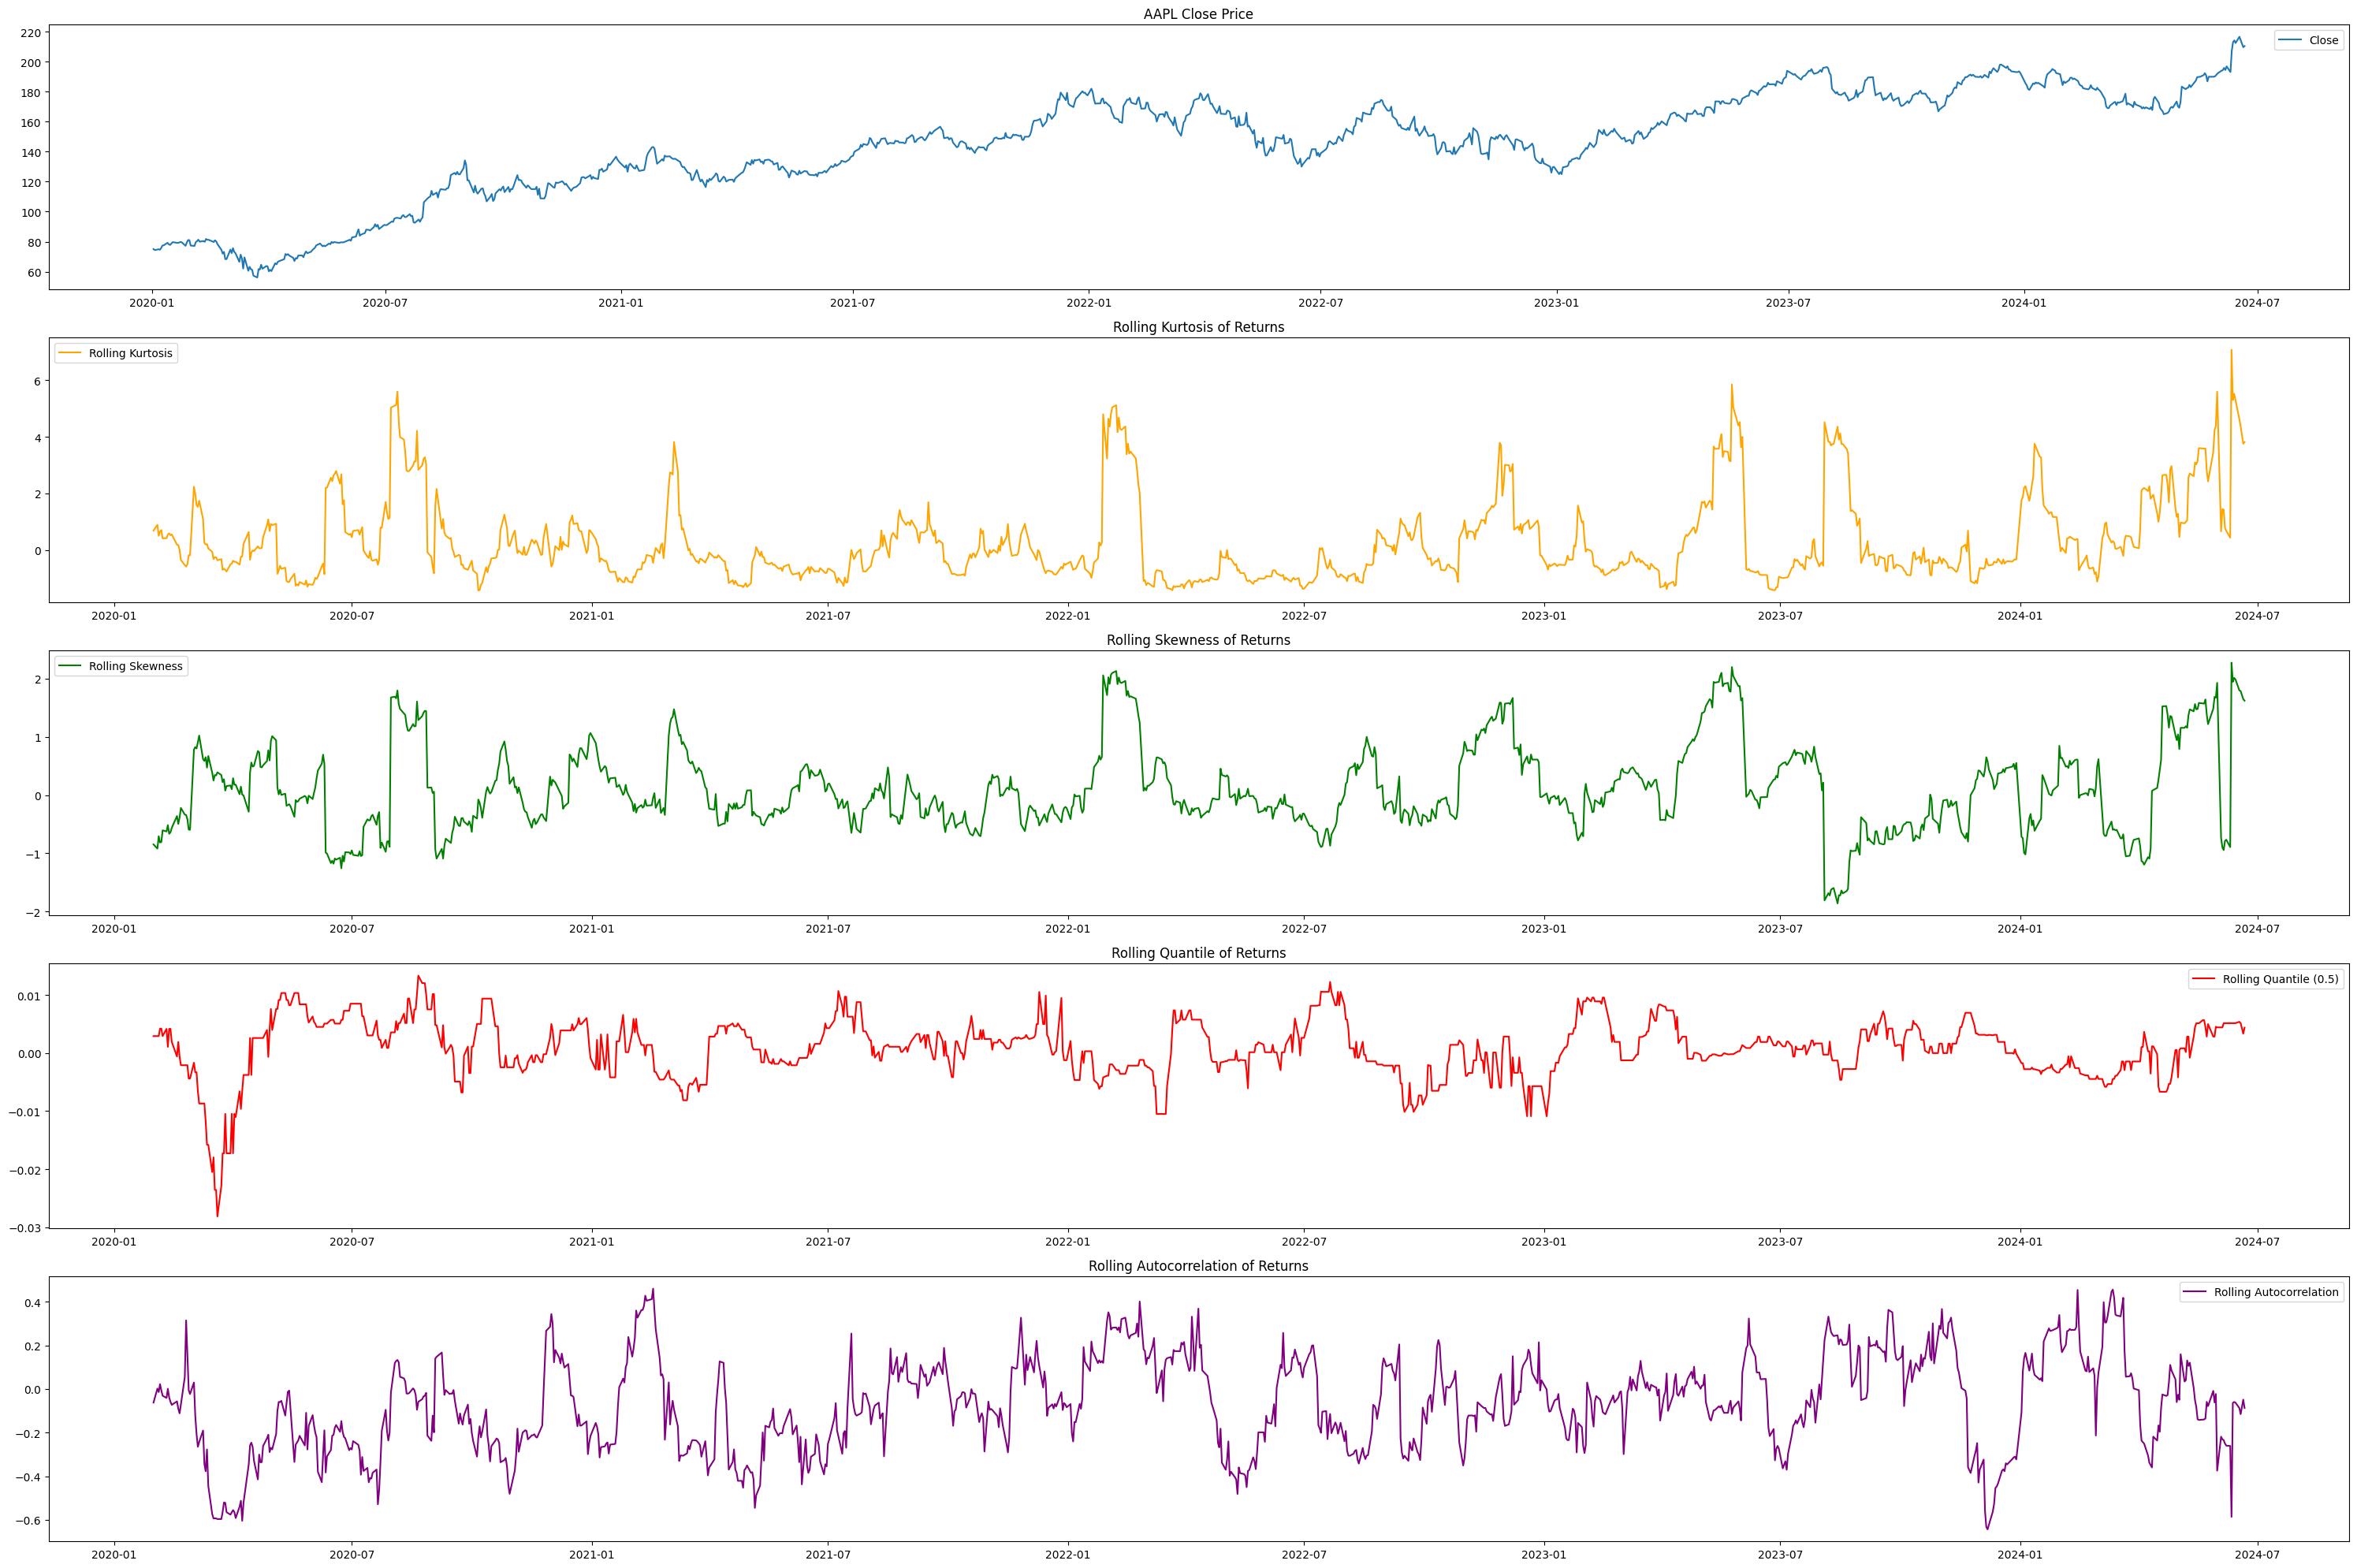

In [18]:
import yfinance as yf   # Importing yfinance library to fetch financial data
import pandas as pd   # Importing pandas library for data manipulation
import matplotlib.pyplot as plt   # Importing matplotlib library for plotting
from scipy.stats import kurtosis, skew   # Importing kurtosis and skew functions from scipy.stats

# Define the ticker symbol
ticker = "AAPL"

# Load historical data from Yahoo Finance
data = yf.download(ticker, start='2020-01-01', end='2024-09-17')

# Compute daily returns
data['Returns'] = data['Close'].pct_change()

# Calculate rolling window size
window_size = 20

# Calculate rolling kurtosis
data['Rolling_Kurtosis'] = data['Returns'].rolling(window_size).apply(kurtosis)

# Calculate rolling skewness
data['Rolling_Skewness'] = data['Returns'].rolling(window_size).apply(skew)

# Calculate rolling quantiles
quantile_value = 0.5  # Adjust this for the quantile you want to calculate
data['Rolling_Quantile'] = data['Returns'].rolling(window_size).quantile(quantile_value)

# Calculate rolling autocorrelation
data['Rolling_Autocorrelation'] = data['Returns'].rolling(window_size).apply(lambda x: x.autocorr())

# Plotting
fig, axes = plt.subplots(5, 1, figsize=(30, 20))

# Plot Close Price
axes[0].plot(data['Close'], label='Close')
axes[0].set_title(f'{ticker} Close Price')
axes[0].legend()

# Plot Rolling Kurtosis
axes[1].plot(data['Rolling_Kurtosis'], label='Rolling Kurtosis', color='orange')
axes[1].set_title('Rolling Kurtosis of Returns')
axes[1].legend()

# Plot Rolling Skewness
axes[2].plot(data['Rolling_Skewness'], label='Rolling Skewness', color='green')
axes[2].set_title('Rolling Skewness of Returns')
axes[2].legend()

# Plot Rolling Quantile
axes[3].plot(data['Rolling_Quantile'], label=f'Rolling Quantile ({quantile_value})', color='red')
axes[3].set_title('Rolling Quantile of Returns')
axes[3].legend()

# Plot Rolling Autocorrelation
axes[4].plot(data['Rolling_Autocorrelation'], label='Rolling Autocorrelation', color='purple')
axes[4].set_title('Rolling Autocorrelation of Returns')
axes[4].legend()

# Adjust layout for better presentation
plt.tight_layout()
plt.show()



### **Tail Ratio**

The Tail Ratio is a statistical measure that provides insights into the asymmetry of extreme returns for a financial asset. It focuses on comparing the potential for extreme positive returns against extreme negative returns, thereby assessing the risk-reward profile in the tail ends of the return distribution.
The Tail Ratio evaluates the distribution of returns beyond the typical range, specifically at the 95th and 5th percentiles of the return distribution. Here’s how it works:

- Extreme Returns Analysis: The Tail Ratio examines the tails of the return distribution, which represent extreme outcomes—both positive and negative—beyond what is considered typical or average.

- Comparative Metric: It quantifies the ratio between the potential for extreme positive returns (at the 95th percentile) and extreme negative returns (at the 5th percentile). This ratio is calculated as follows:

$\text{Tail Ratio} = \frac{\text{Return at 95th percentile}}{\text{Return at 5th percentile}}$

**Interpretation**

A Tail Ratio greater than 1 indicates that the asset’s potential for extreme positive returns is higher than its potential for extreme negative returns. This suggests a skewed distribution towards positive outcomes in the tail.

Conversely, a Tail Ratio below 1 implies that the asset’s potential for extreme negative returns outweighs its potential for extreme positive returns. This indicates a higher risk of negative outcomes relative to positive ones in the tail of the distribution.


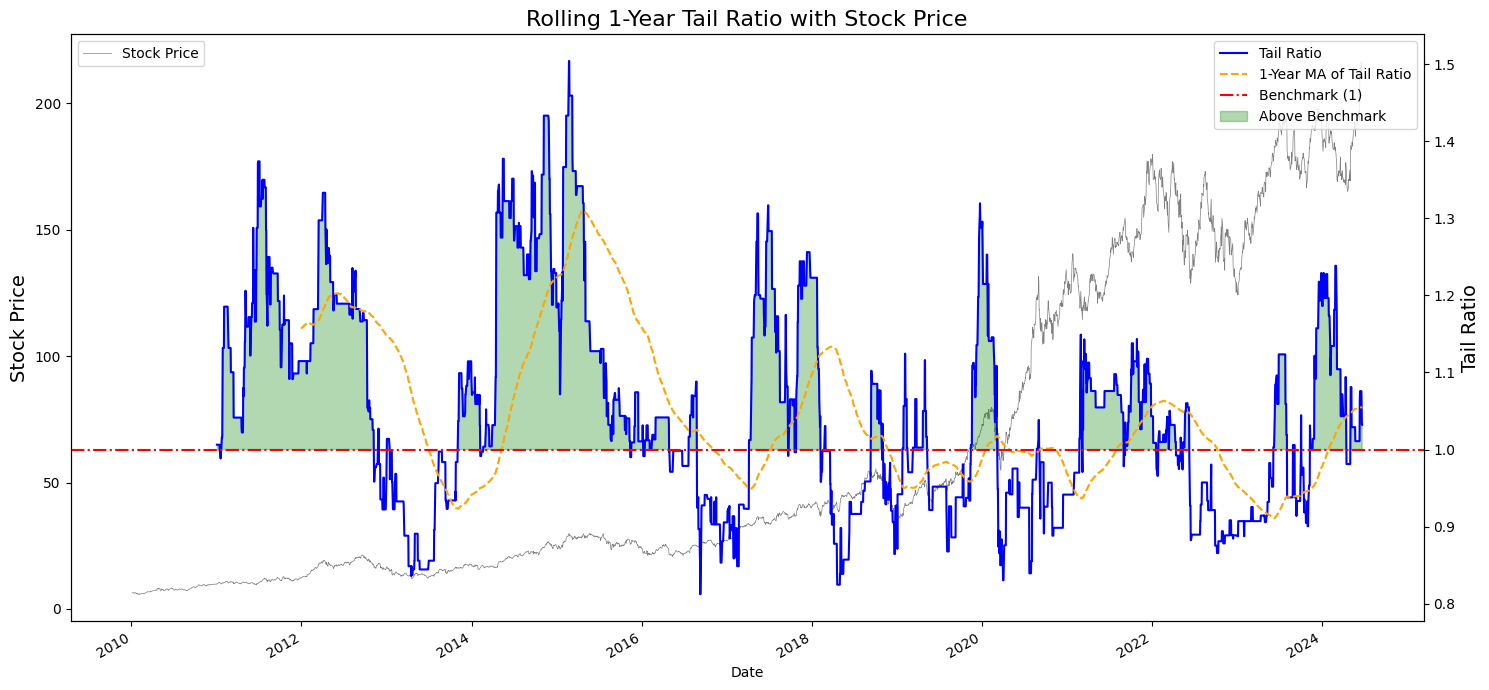

In [20]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = "AAPL"

# Download historical data for the ticker
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculate rolling 1-year Tail Ratio
tail_ratio = tickerDf['returns'].rolling(window=252).apply(lambda x: np.abs(np.percentile(x, 95)) / np.abs(np.percentile(x, 5))).dropna()

# Aesthetics
plt.figure(figsize=(15,7))

# Plot stock price
ax1 = plt.gca()
tickerDf['Close'].plot(ax=ax1, color='gray', linewidth=0.5, label='Stock Price')
ax1.set_ylabel('Stock Price', fontsize=14)
ax1.legend(loc='upper left')

# Plot tail ratio
ax2 = ax1.twinx()
ax2.plot(tail_ratio.index, tail_ratio, color='blue', linewidth=1.5, label='Tail Ratio')

# Plotting a simple moving average of the tail ratio
ax2.plot(tail_ratio.index, tail_ratio.rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Tail Ratio')

# Horizontal line for benchmark tail ratio of 1
ax2.axhline(y=1, color='red', linestyle='-.', label='Benchmark (1)')

# Shade region where tail ratio is above 1
ax2.fill_between(tail_ratio.index, tail_ratio, 1, where=(tail_ratio > 1), color='green', alpha=0.3, label='Above Benchmark')

# Aesthetics for the tail ratio plot
ax2.set_ylabel('Tail Ratio', fontsize=14)
ax2.legend(loc='upper right')

plt.title('Rolling 1-Year Tail Ratio with Stock Price', fontsize=16)
ax2.grid(False)  # Turn off grid for the second axis

plt.tight_layout()
plt.show()


### **Omega Ratio**

The Omega Ratio is a financial performance measure that evaluates the risk-return profile of an investment relative to a benchmark or a minimum acceptable return (MAR). It provides insights into the potential reward received for the risk taken, focusing on the distribution of returns above and below a specified threshold.

The Omega Ratio is defined as the ratio of the cumulative probability of returns above a benchmark (MAR) to the cumulative probability of returns below the benchmark. Mathematically, it can be expressed as:

$\text{Omega Ratio} = \frac{\text{Probability of Returns} > \text{MAR}}{\text{Probability of Returns} < \text{MAR}}$

where:

- $\text{MAR}$ is the Minimum Acceptable Return or a chosen benchmark return level.

- $\text{Probability of Returns} > \text{MAR}$ is the cumulative probability of returns greater than $MAR$

- $\text{Probability of Returns} < \text{MAR}$ is the cumulative probability of returns greater than $MAR$

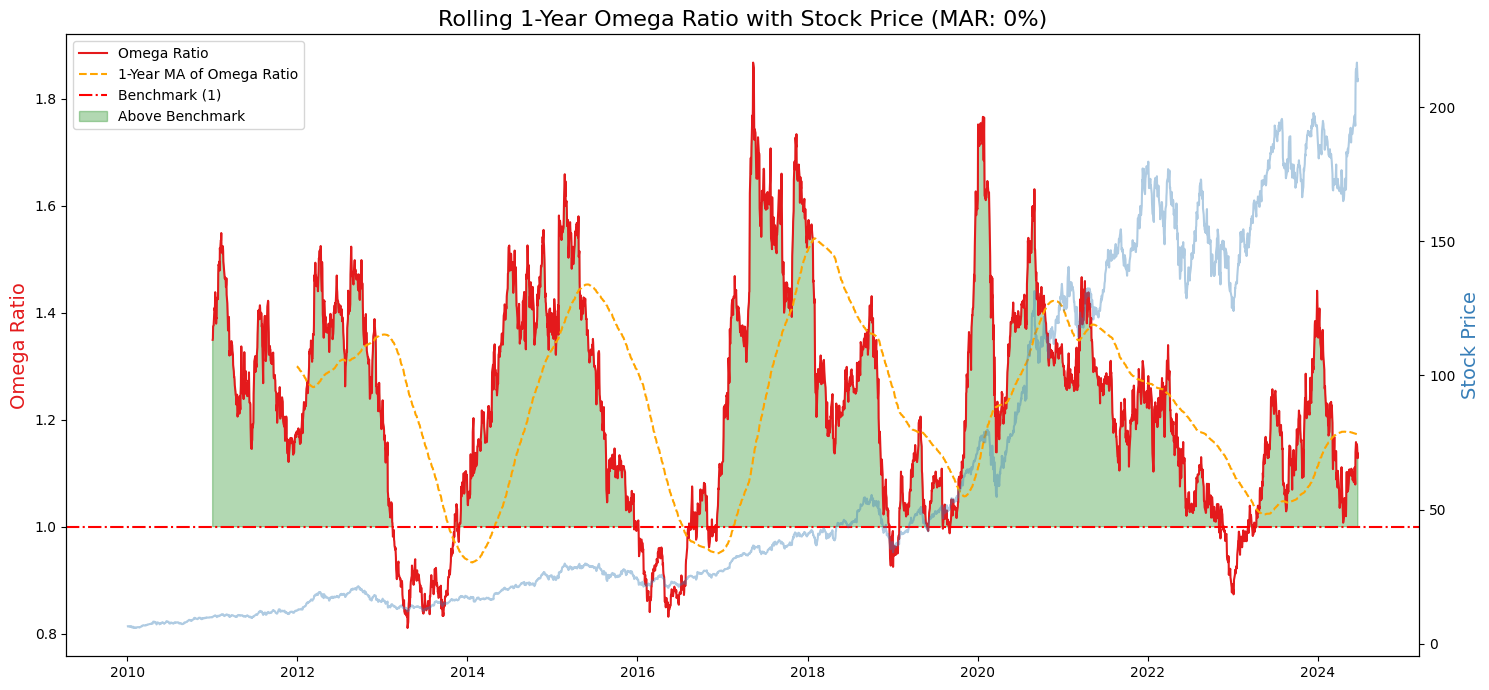

In [21]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol and retrieve historical data
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Define Minimum Acceptable Return (MAR)
MAR = 0  # Assume MAR as 0 for illustration

# Calculate Omega Ratio with a rolling 1-year window (252 trading days)
omega_ratio = tickerDf['returns'].rolling(252).apply(lambda x: np.sum(x[x > MAR] - MAR) / np.sum(MAR - x[x < MAR])).dropna()

# Aesthetics for the plot
plt.figure(figsize=(15, 7))
palette = plt.get_cmap('Set1')

# Plot Omega Ratio
plt.plot(omega_ratio.index, omega_ratio, color=palette(0), linewidth=1.5, label='Omega Ratio')

# Plotting a simple moving average of the Omega Ratio
plt.plot(omega_ratio.index, omega_ratio.rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Omega Ratio')

# Horizontal line for benchmark Omega Ratio of 1
plt.axhline(y=1, color='red', linestyle='-.', label='Benchmark (1)')

# Shade region where Omega Ratio is above 1
plt.fill_between(omega_ratio.index, omega_ratio, 1, where=(omega_ratio > 1), color='green', alpha=0.3, label='Above Benchmark')

# Aesthetics for Omega Ratio plot
plt.ylabel('Omega Ratio', fontsize=14, color=palette(0))
plt.legend(loc='upper left')
plt.title(f'Rolling 1-Year Omega Ratio with Stock Price (MAR: {MAR*100}%)', fontsize=16)

# Stock Price plot on secondary y-axis
plt.twinx()
plt.plot(tickerDf.index, tickerDf['Close'], color=palette(1), alpha=0.4, label='Stock Price')
plt.ylabel('Stock Price', fontsize=14, color=palette(1))

plt.tight_layout()
plt.show()


 ### **Sortino Ratio**

The Sortino Ratio is a financial metric used to evaluate the risk-adjusted return of an investment, focusing specifically on the downside risk or negative volatility. Unlike the Sharpe Ratio, which considers total volatility (both upside and downside), the Sortino Ratio emphasizes the volatility that falls below a predefined threshold, often referred to as the Minimum Acceptable Return (MAR).

The Sortino Ratio is calculated using the following formula:

$\text{Sortino Ratio} = \frac{R_p - MAR}{\sigma_d}$


Key Points:
- Focus on Downside Risk: Unlike the Sharpe Ratio, which considers all volatility, the Sortino Ratio concentrates solely on the risk associated with returns falling below the MAR. This makes it particularly useful for investors who are primarily concerned with minimizing downside risk.

- Tailored Risk Evaluation: By excluding the volatility of positive returns, the Sortino Ratio provides a more tailored assessment of risk, aligning closely with investors' specific risk tolerance levels and investment objectives.

- Interpretation:

    - A higher Sortino Ratio indicates that the investment is achieving a higher return relative to its downside risk.
    - Conversely, a lower Sortino Ratio suggests that the investment may not adequately compensate for the risk of achieving returns below the MAR.

- Limitations:
    Like any ratio, the Sortino Ratio has limitations. It relies on historical data and assumes that past performance is indicative of future results.
    It also depends heavily on the chosen MAR, which can vary among investors and may affect the interpretation of risk-adjusted performance.


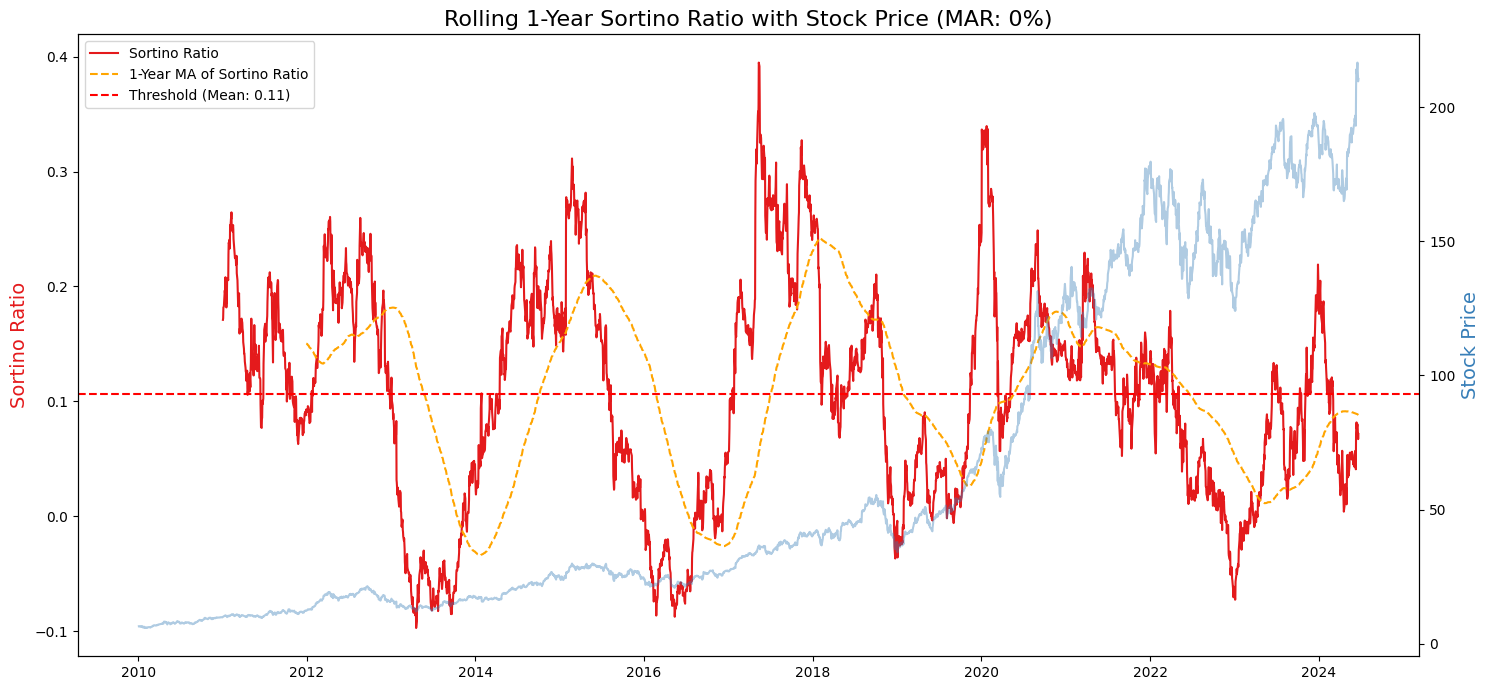

In [22]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch Data
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Minimum Acceptable Return (MAR)
MAR = 0

# Calculate Sortino Ratio
sortino_ratio = tickerDf['returns'].rolling(252).apply(lambda x: np.mean(x - MAR) / np.sqrt(np.mean(np.minimum(0, x - MAR)**2)), raw=True)

# Calculate threshold for Sortino Ratio
threshold = sortino_ratio.mean()

# Aesthetics
plt.figure(figsize=(15,7))
palette = plt.get_cmap('Set1')

# Plot Sortino Ratio
ax1 = plt.gca()
ax1.plot(sortino_ratio.index, sortino_ratio, color=palette(0), linewidth=1.5, label='Sortino Ratio')

# Smoothened Sortino Ratio with a moving average
ax1.plot(sortino_ratio.index, sortino_ratio.rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Sortino Ratio')
ax1.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (Mean: {threshold:.2f})')

# Aesthetics for Sortino Ratio plot
ax1.set_ylabel('Sortino Ratio', fontsize=14, color=palette(0))
ax1.legend(loc='upper left')
ax1.set_title(f'Rolling 1-Year Sortino Ratio with Stock Price (MAR: {MAR*100}%)', fontsize=16)

# Stock Price Plot on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(tickerDf.index, tickerDf['Close'], color=palette(1), alpha=0.4, label='Stock Price')
ax2.set_ylabel('Stock Price', fontsize=14, color=palette(1))

plt.tight_layout()
plt.show()


### **Calmar Ratio**


The Calmar Ratio, named after its creator Terry W. Young, is a risk-adjusted measure used to evaluate the performance of investment portfolios, particularly those that are subject to significant volatility and drawdowns. It is widely used in the finance industry to assess the relationship between the annualized rate of return and the maximum drawdown of an investment over a specified period.

The Calmar Ratio is calculated using the following formula:

$\text{Calmar Ratio} = \frac{\text{Compound Annual Growth Rate (CAGR)}}{\text{Maximum Drawdown}}$

Compound Annual Growth Rate (CAGR): This represents the mean annual growth rate of an investment over a specified period of time. It is computed as:

$\text{CAGR} = \left( \frac{\text{Ending Value}}{\text{Beginning Value}} \right)^{\frac{1}{\text{Number of Years}}} - 1$

Maximum Drawdown: This measures the largest percentage decline in asset value from its peak to its trough over a specific time frame. It quantifies the maximum loss an investment has experienced before a new peak is attained.

The Calmar Ratio provides insights into the risk-adjusted performance of an investment by considering both the potential return (CAGR) and the downside risk (Maximum Drawdown). A higher Calmar Ratio indicates that the investment has generated higher returns relative to the magnitude of its worst drawdowns, suggesting better risk-adjusted performance. Conversely, a lower Calmar Ratio implies that the investment's returns are not sufficient relative to the risk taken on during drawdown periods.




C:\Users\paras\AppData\Local\Temp\ipykernel_40268\3571608067.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  calmar_ratio = tickerDf['returns'].rolling(252).apply(lambda x: (1 + x).cumprod()[-1] ** (252.0 / len(x)) / np.abs(np.min(x)))


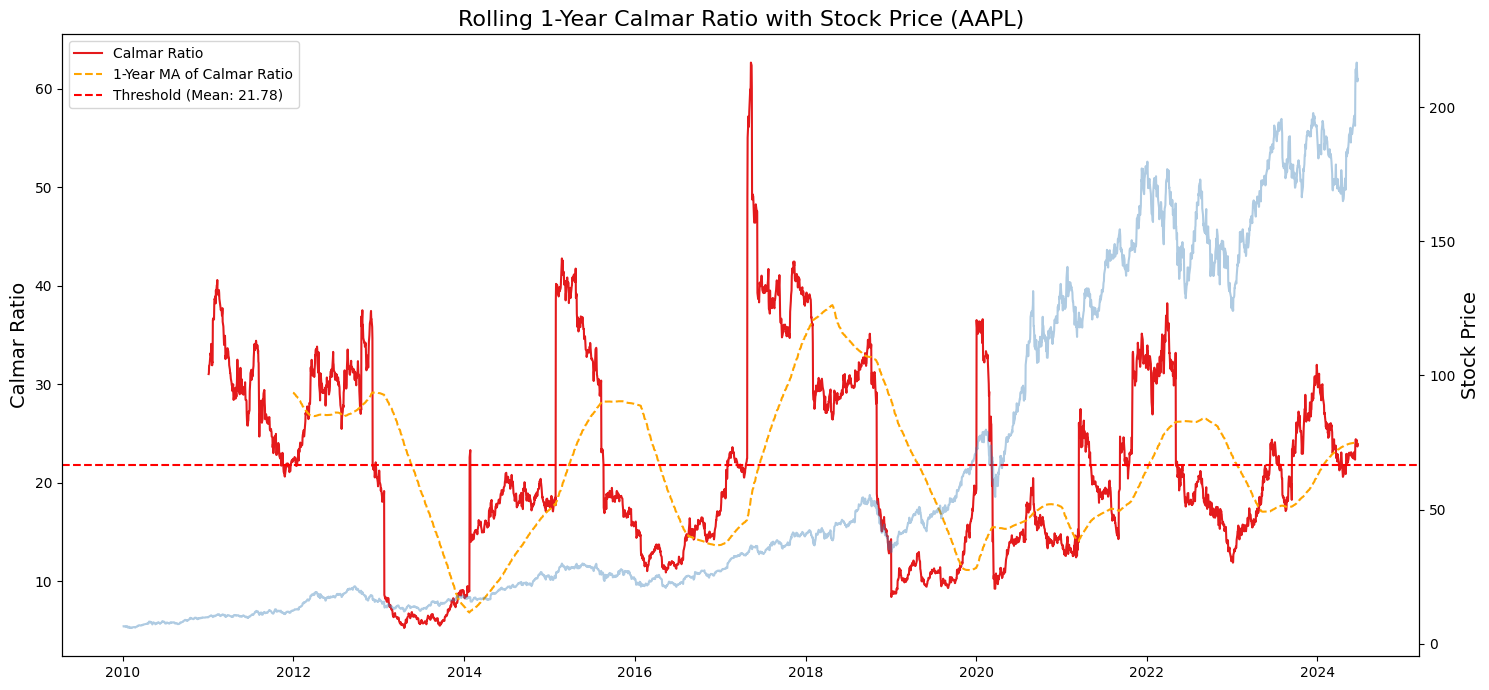

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol
tickerSymbol = "AAPL"

# Fetch historical data
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')

# Calculate daily returns
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculate Calmar Ratio
calmar_ratio = tickerDf['returns'].rolling(252).apply(lambda x: (1 + x).cumprod()[-1] ** (252.0 / len(x)) / np.abs(np.min(x)))

# Calculate threshold Calmar Ratio
threshold_calmar = calmar_ratio.mean()

# Plotting
plt.figure(figsize=(15,7))
palette = plt.get_cmap('Set1')

# Plot Calmar Ratio
ax1 = plt.gca()
ax1.plot(calmar_ratio.index, calmar_ratio, color=palette(0), linewidth=1.5, label='Calmar Ratio')
ax1.plot(calmar_ratio.index, calmar_ratio.rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Calmar Ratio')
ax1.axhline(y=threshold_calmar, color='red', linestyle='--', label=f'Threshold (Mean: {threshold_calmar:.2f})')

# Aesthetics for Calmar Ratio plot
ax1.set_title('Rolling 1-Year Calmar Ratio with Stock Price (AAPL)', fontsize=16)
ax1.set_ylabel('Calmar Ratio', fontsize=14)
ax1.legend(loc='upper left')

# Plot Stock Price on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(tickerDf.index, tickerDf['Close'], color=palette(1), alpha=0.4, label='Stock Price')
ax2.set_ylabel('Stock Price', fontsize=14)

plt.tight_layout()
plt.show()


### **Returns Stability**

Stability of returns is a critical metric for investors seeking insights into the consistency and predictability of a portfolio's performance over time. It measures the deviation of the portfolio's actual returns from a linear trend, thereby indicating how much the returns have strayed from an expected linear growth trajectory.

Cumulative Logarithmic Returns (CLR): Calculate the cumulative logarithmic returns of the portfolio over time. This involves taking the logarithm of the ratio of each day's closing price to the initial closing price and summing them up.

$CLR_t = \sum_{i=1}^{t} \log \left( \frac{P_i}{P_0} \right)$ 

Where P_i is the closing price on day i and  P_0 is the initial closing price.

Linear Regression Trend (Expected Cumulative Returns): Perform a linear regression on the cumulative logarithmic returns to estimate the linear trend line. The linear regression equation provides the expected cumulative returns over time.

Stability Calculation: Compare the actual cumulative logarithmic returns (CLR) with the expected cumulative returns derived from the linear regression trend. Stability can then be quantified using statistical measures such as the coefficient of determination (R-squared) or by analyzing the deviation of CLR from the trend line.

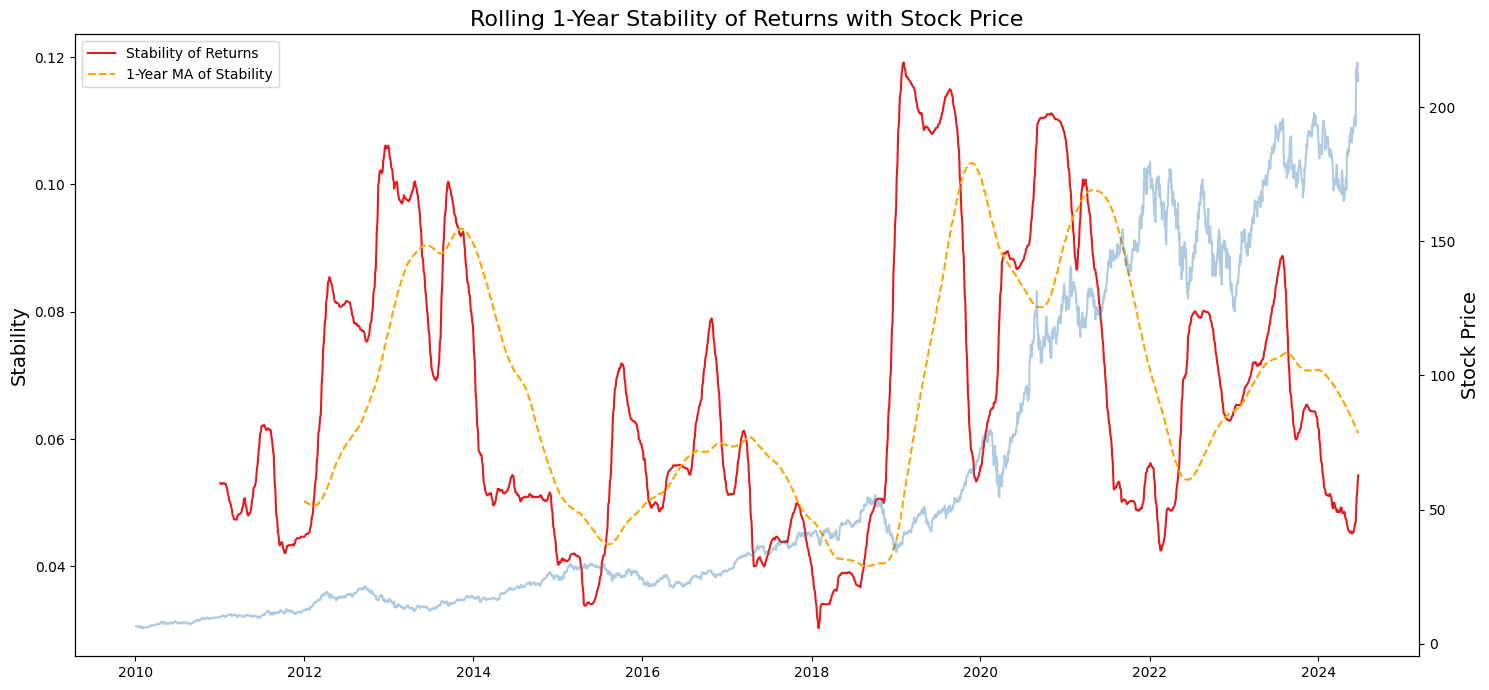

In [27]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Fetching data for Apple (AAPL)
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculating Stability of Returns
window_size = 252

def calculate_stability(returns):
    cumulative_log_returns = np.log1p(returns).cumsum()
    slope, intercept, r_value, p_value, std_err = linregress(np.arange(len(cumulative_log_returns)), cumulative_log_returns)
    stability = np.std(cumulative_log_returns - (slope * np.arange(len(cumulative_log_returns))))
    return stability

stability = tickerDf['returns'].rolling(window_size).apply(calculate_stability)

# Plotting
plt.figure(figsize=(15,7))
palette = plt.get_cmap('Set1')

# Plot Stability of Returns
ax1 = plt.gca()
ax1.plot(stability.index, stability, color=palette(0), linewidth=1.5, label='Stability of Returns')
ax1.plot(stability.index, stability.rolling(window=252).mean(), color='orange', linestyle='--', label='1-Year MA of Stability')
ax1.set_title('Rolling 1-Year Stability of Returns with Stock Price', fontsize=16)
ax1.set_ylabel('Stability', fontsize=14)
ax1.legend(loc='upper left')

# Overlay Stock Price on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(tickerDf.index, tickerDf['Close'], color=palette(1), alpha=0.4, label='Stock Price')
ax2.set_ylabel('Stock Price', fontsize=14)

plt.tight_layout()
plt.show()


### **Maximum Drawdown**

Maximum Drawdown (MDD) is a crucial risk metric used in finance to quantify the largest single drop in the value of an investment from its peak to its subsequent trough over a specific period. It provides investors with insight into the worst-case scenario in terms of loss that could have been experienced historically for a given investment.

$\text{MDD} = \frac{P_{\text{peak}} - P_{\text{trough}}}{P_{\text{peak}}}$

Maximum Drawdown measures the percentage decline from the highest point of an investment to the lowest point over a specified time period. It quantifies the extent of loss that an investor could have endured during the worst drawdown period.



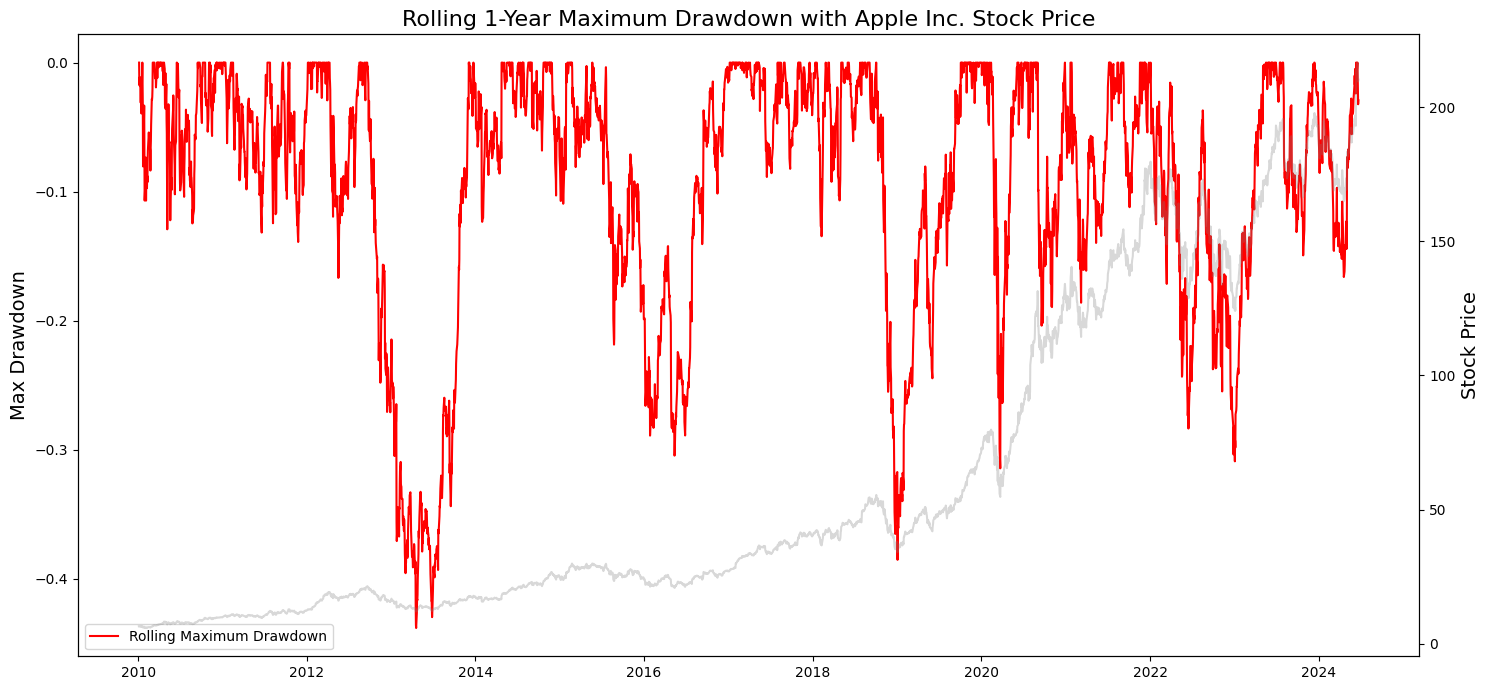

In [26]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetching Apple stock data
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Calculating rolling cumulative returns
rolling_cumulative = (1 + tickerDf['returns']).cumprod()

# Calculating rolling maximum of cumulative returns
rolling_max = rolling_cumulative.rolling(252, min_periods=1).max()

# Calculating rolling drawdown
rolling_drawdown = (rolling_cumulative - rolling_max) / rolling_max

# Plotting Maximum Drawdown
plt.figure(figsize=(15,7))
ax1 = plt.gca()
ax1.plot(rolling_drawdown, label='Rolling Maximum Drawdown', linewidth=1.5, color='red')
ax1.set_title('Rolling 1-Year Maximum Drawdown with Apple Inc. Stock Price', fontsize=16)
ax1.set_ylabel('Max Drawdown', fontsize=14)
ax1.legend()

# Overlaying stock price on a secondary y-axis
ax2 = ax1.twinx()
ax2.plot(tickerDf['Close'], color='grey', alpha=0.3, label='Stock Price')
ax2.set_ylabel('Stock Price', fontsize=14)

# Adjusting layout and displaying the plot
plt.tight_layout()
plt.show()


### **Upside Capture and Downside Capture**

Capture ratios are essential metrics used in finance to assess how well an investment performs relative to a benchmark index, especially in varying market conditions. They provide insights into an investment's ability to capture or avoid movements in the benchmark, shedding light on both upside potential and downside risk.

Upside Capture Ratio
The Upside Capture Ratio measures how effectively an investment capitalizes on positive movements in a benchmark index. It compares the performance of the investment during periods when the benchmark index has positive returns.


$\text{Upside Capture Ratio} = \frac{\text{Investment's Return in Up Markets}}{\text{Benchmark's Return in Up Markets}} \times 100$

- Investment's Return in Up Markets: Average return of the investment when the benchmark index has positive returns.

- Benchmark's Return in Up Markets: Average return of the benchmark index during periods of positive returns.

Downside Capture Ratio
The Downside Capture Ratio assesses how an investment fares relative to a benchmark index during periods of market decline or negative returns. It highlights the investment's performance in bearish market conditions.

$\text{Downside Capture Ratio} = \frac{\text{Investment's Return in Down Markets}}{\text{Benchmark's Return in Down Markets}} \times 100$

- Investment's Return in Down Markets: Average return of the investment when the benchmark index has negative returns.

- Benchmark's Return in Down Markets: Average return of the benchmark index during periods of negative returns.

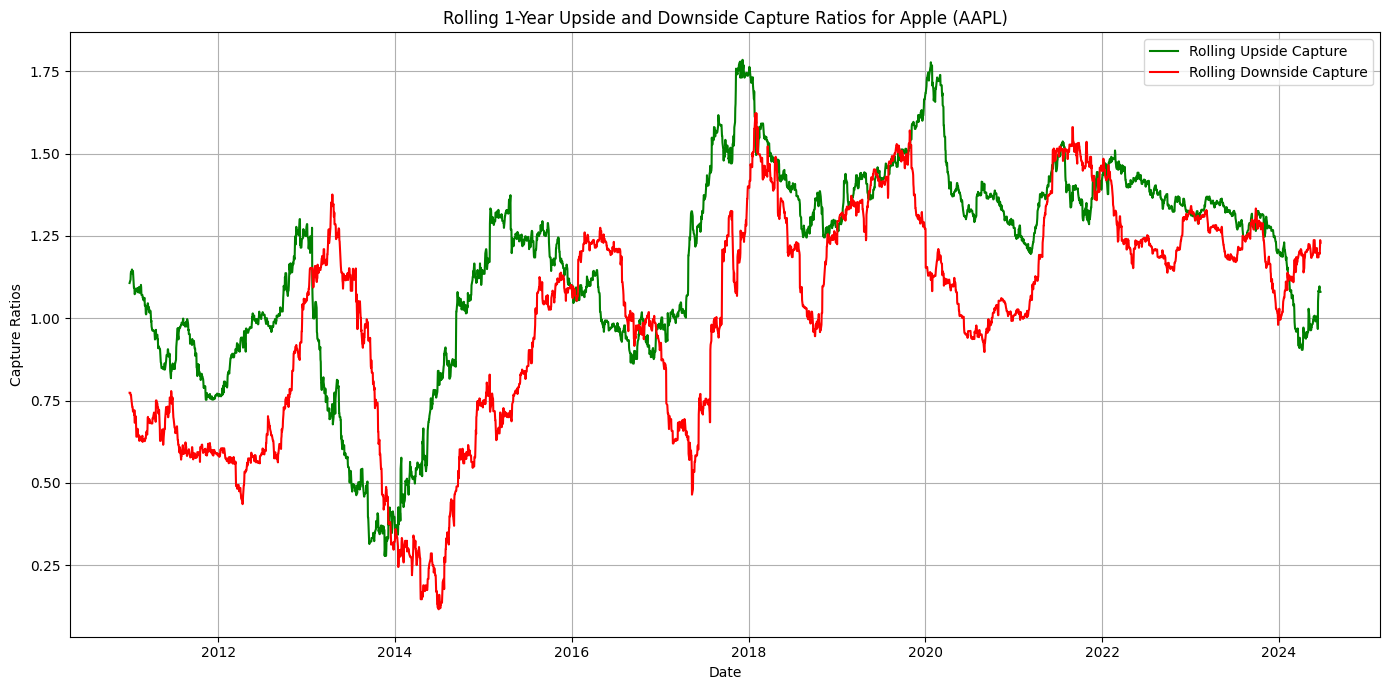

In [25]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

# Fetch data for Apple (AAPL) stock
tickerSymbol = "AAPL"
tickerData = yf.Ticker(tickerSymbol)
tickerDf = tickerData.history(period='1d', start='2010-1-1')
tickerDf['returns'] = tickerDf['Close'].pct_change()

# Market data for benchmark (S&P 500)
market_data = yf.Ticker("^GSPC").history(period='1d', start='2010-1-1')
market_data['returns'] = market_data['Close'].pct_change()

# Align market data indices with stock data
market_data = market_data.reindex(tickerDf.index, method='ffill')

# Define rolling window size
window_size = 252

def calculate_capture(stock_returns, market_returns, is_upside=True):
    relevant_returns = stock_returns[market_returns > 0] if is_upside else stock_returns[market_returns < 0]
    relevant_market_returns = market_returns[market_returns > 0] if is_upside else market_returns[market_returns < 0]
    return relevant_returns.sum() / relevant_market_returns.sum()

def compute_rolling_captures(stock_returns, market_returns, window):
    upside_captures = []
    downside_captures = []
    
    for idx in range(len(stock_returns) - window + 1):
        current_window_stock = stock_returns.iloc[idx: idx + window]
        current_window_market = market_returns.iloc[idx: idx + window]
        
        upside = calculate_capture(current_window_stock, current_window_market, is_upside=True)
        downside = calculate_capture(current_window_stock, current_window_market, is_upside=False)
        
        upside_captures.append(upside)
        downside_captures.append(downside)
    
    # Padding the initial values with NaNs to make the length equal to the original data
    nan_padding = [np.nan] * (window - 1)
    upside_captures = nan_padding + upside_captures
    downside_captures = nan_padding + downside_captures
    
    return upside_captures, downside_captures

# Calculate rolling upside and downside capture ratios
tickerDf['rolling_upside_capture'], tickerDf['rolling_downside_capture'] = compute_rolling_captures(
    tickerDf['returns'], market_data['returns'], window_size
)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(tickerDf['rolling_upside_capture'], label="Rolling Upside Capture", color='g')
plt.plot(tickerDf['rolling_downside_capture'], label="Rolling Downside Capture", color='r')
plt.title('Rolling 1-Year Upside and Downside Capture Ratios for Apple (AAPL)')
plt.xlabel('Date')
plt.ylabel('Capture Ratios')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
